## This Jupyter notebook lets users analyze data generated with the pc4covid19 app.
### Select a notebook cell (with Python code) and 'Run' it to see results.

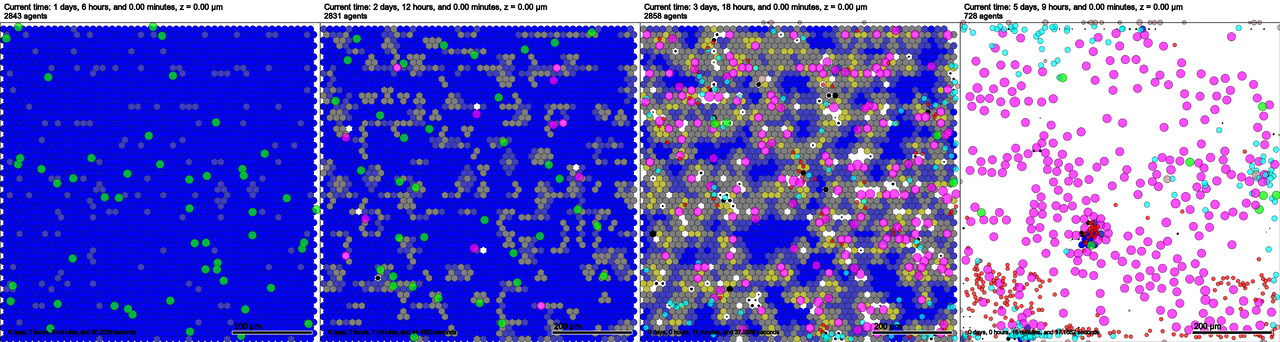

In [1]:
from IPython.display import Image
Image(filename="data/cells_4times.jpg")

In [ ]:
import os
import glob
os.chdir('data')
xml_files = glob.glob('output*.xml')
xml_files.sort()
os.chdir('..')
print(xml_files)

## Read a single data file and find out how many cells there are of different cell types. You can change the filename and press "Shift-Enter" to re-execute the notebook cell.

In [ ]:
from pyMCDS_cells import pyMCDS_cells
import numpy as np

# ---> Edit the .xml filename to see different results
mcds = pyMCDS_cells('output00000030.xml','data')
#mcds = pyMCDS_cells('output00000043.xml','data')   # max file index is 43
print('time=',mcds.get_time())
cell_type = mcds.data['discrete_cells']['cell_type']
#print(cell_type)
cd8 = np.where(cell_type == 3.0)
macrophage = np.where(cell_type == 4.0)
neutrophil = np.where(cell_type == 5.0)
print('# cd8, macrophage, neutrophil = ',len(cd8[0]), len(macrophage[0]), len(neutrophil[0]) )

In [ ]:
# Loop over all output files and store one array of times and one array of numbers of macrophages
n = len(xml_files)
t= np.zeros(n)
num_mac = np.zeros(n)
idx = 0
for f in xml_files:
    mcds = pyMCDS_cells(f,'data')
    cell_type = mcds.data['discrete_cells']['cell_type']
    macrophage = np.where(cell_type == 4.0)
    t[idx] = mcds.get_time()
    num_mac[idx] = len(macrophage[0])
    idx += 1

In [ ]:
t

In [ ]:
num_mac

In [ ]:
import matplotlib.pyplot as plt
plt.plot(t,num_mac,'-o',)
plt.show()

In [ ]:
# Loop over all output files and store times and counts of cell types
num_cd8 = np.zeros(n)
num_neut = np.zeros(n)

idx = 0
for f in xml_files:
    mcds = pyMCDS_cells(f,'data')
    cell_type = mcds.data['discrete_cells']['cell_type']
    cd8 = np.where(cell_type == 3.0)
    neutrophil = np.where(cell_type == 5.0)
    t[idx] = mcds.get_time()
    num_cd8[idx] = len(cd8[0])
    num_neut[idx] = len(neutrophil[0])
    idx += 1

In [ ]:
plt.plot(t,num_mac,'blue', t,num_cd8,'red', t,num_neut,'green')

## Experiment with plotting side-by-side results

In [ ]:
# Experiment with plotting side-by-side results. Notice we change the colors of the 
# line plots to match the colors of the cell types.
import matplotlib.image as mpimg
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,7))

ax1.set_xlim([0, 8000])
ax1.set_ylim([0, 310])
ax1.plot(t,num_mac,'fuchsia', t,num_cd8,'red', t,num_neut,'cyan')
img = np.uint8(mpimg.imread('data/snapshot00000043.jpg'))

ax2.imshow(img)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)

## Now add a Jupyter widget (a slider) for interaction

In [ ]:
from ipywidgets import interactive 

def plot_data(frame):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,7))

    ax1.set_xlim([0, 8000])
    ax1.set_ylim([0, 310])
    ax1.plot(t,num_mac,'fuchsia', t,num_cd8,'red', t,num_neut,'cyan', [t[frame]],[num_mac[frame]],'ko', 
             [t[frame]],[num_cd8[frame]],'ko', [t[frame]],[num_neut[frame]],'ko')
    fname = "data/snapshot%08d.jpg" % frame

    img_data = np.uint8(mpimg.imread(fname))
    img = ax2.imshow(img_data)
    ax2.xaxis.set_visible(False)
    ax2.yaxis.set_visible(False)
    plt.ion()
    plt.show()
    
i_plot = interactive(plot_data, frame=(0, 43), continuous_update=False)
display(i_plot)